# Characterization of Discrete Systems

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Convolution of an Audio Signal with a Room Impulse Response

The propagation of sound in rooms is modeled by the linear [wave equation](https://en.wikipedia.org/wiki/Wave_equation), a second-order linear partial differential equation with constant coefficients. Consequently, the propagation path from a source (e.g. loudspeaker) at one position to a receiver (e.g. microphone) at another position can be interpreted as an LTI system. This system is characterized for instance by the impulse response between these two positions. This fact can be used for the synthesis of virtual acoustic environments. If a source signal (e.g. speech, instrument) without any room effect is convolved with the impulse response of a room (e.g. concert hall), the impression is created that the source playes in the room . This is also known as [convolution reverb](https://en.wikipedia.org/wiki/Convolution_reverb).

#### Read Speech Signal

First a source signal $x[k]$ is loaded into the vector `x` using the Python library [`PySoundFile`](http://pysoundfile.readthedocs.io/en/latest/)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as sig

x, fs = sf.read('../data/speech.wav')

The input signal $x[k]$ is plotted. For ease of illustration, the sample index $k$ is interpreted as time $t = k T$ with the sampling interaval $T$.

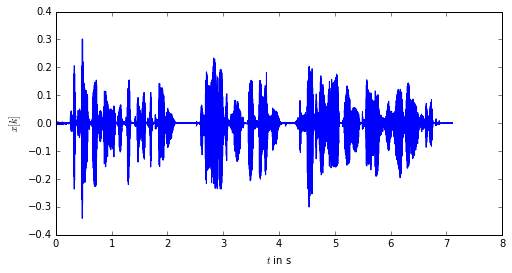

In [2]:
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(x))
plt.plot(t, x)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$x[k]$');

#### Read Room Impulse Response

The impulse response $h[k]$ of the room is loaded into the vector `h`

In [3]:
h, fsh = sf.read('../data/room_impulse_response.wav')

The room impulse response is plotted for illustration

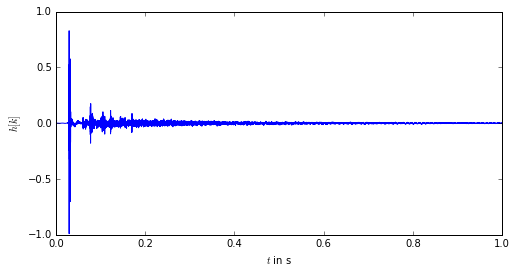

In [4]:
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(h))
plt.plot(t, h)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$h[k]$');

#### Convolution

The source signal $x[k]$ is convolved with the room impulse response $h[k]$ in order to compute the output signal $y[k] = x[k] * h[k]$. The computation may take a while due to the involved numerical complexity.

In [5]:
y = np.convolve(h, x)

The output signal $y[k]$ is plotted for illustration. The effect of the room on the source signal is clearly visible.

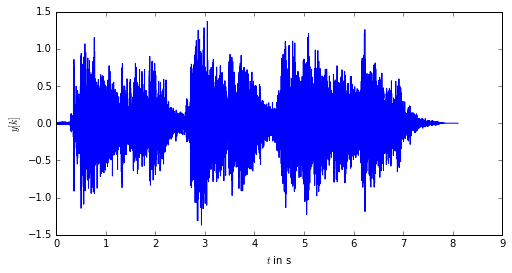

In [6]:
plt.figure(figsize=(8,4))
t = 1/fs*np.arange(len(y))
plt.plot(t, y)
plt.xlabel(r'$t$ in s')
plt.ylabel(r'$y[k]$');

#### Auralization

The input signal $x[k]$ and the output signal $y[k]$ are normalized and written to files for the purpose of auralization.

In [7]:
x = 0.9 * x / np.max(np.abs(x))
sf.write('dry_source.wav', x, fs)

y = 0.9 * y / np.max(np.abs(y))
sf.write('wet_source.wav', y, fs)

Listen to the 'dry' source signal without room effect (input) and the 'wet' signal including the room effect (output) using the embedded controls below.

**Dry source signal without room**
<audio src="dry_source.wav" controls>Your browser does not support the audio element.</audio>
[dry_source.wav](dry_source.wav)

**Wet source signal including room**
<audio src="output.wav" controls>Your browser does not support the audio element.</audio>
[wet_source.wav](wet_source.wav)

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.